### In the [the file](https://storage.yandexcloud.net/lms-itmo-ru-files-27a87tyf/machine_learning/task2/task2.1/data/66_16.csv) there is a set of synthetic data. The data describes 60 objects, each of which has 10 features. Your task is to switch to the new coordinates using the principal components method and find the following parameters.


> Enter the coordinate of the first object with respect to the first principal component:

> Enter the coordinate of the first object with respect to the second principal component:


##### 0. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

##### 1. Load the Data

In [2]:
data = pd.read_csv('https://storage.yandexcloud.net/lms-itmo-ru-files-27a87tyf/machine_learning/task2/task2.1/data/66_16.csv', encoding = 'utf-8', delimiter=',', header=None)
data.head() # Display the first 5 rows of the result

,0,1,2,3,4,5,6,7,8,9
0,-18.760648,-16.947337,-5.113519,9.640007,-15.131418,-13.176784,13.114778,-0.153631,-2.218653,-1.556670
1,-17.631096,-19.820593,-4.454293,9.472988,-14.985504,-12.840418,11.089504,4.987311,-1.082840,-0.596177
2,-23.422658,16.187413,-9.693314,-24.553554,6.888665,22.679111,1.597002,1.348615,7.100830,5.247621
3,-20.945721,15.541144,-6.863941,-25.780044,9.016722,20.413783,2.762732,0.171296,6.907661,5.582567
4,-10.482212,-26.231238,-16.789358,20.042900,-21.210618,-4.860438,-17.591560,-20.684578,-21.799205,-20.775966


##### 2. Perform PCA to reduce data to 2 principal components

In [3]:
pca = PCA(n_components=2, svd_solver='full').fit_transform(data)

##### 3. store the transformed data in a DataFrame

In [4]:
scores_df = pd.DataFrame(pca, columns=['PC1', 'PC2']) # Create DataFrame with principal components
scores_df.head() # Display the first 5 rows of the result

,PC1,PC2
0,-13.667246,23.964783
1,-14.052254,27.595600
2,43.831416,12.236114
3,44.071577,11.758556
4,-43.504137,-4.301499


In [5]:
print(f'The coordinate of the first object with respect to the first principal component: {round(scores_df["PC1"][0],3)}')

The coordinate of the first object with respect to the first principal component: -13.667


In [6]:
print(f'The coordinate of the first object with respect to the second principal component: {round(scores_df["PC2"][0],3)}')

The coordinate of the first object with respect to the second principal component: 23.965



> Enter the fraction of variance explained (first and second components):


In [7]:
pca2 = PCA(n_components=2, svd_solver='full').fit(data)
print(f'The fraction of variance explained when the first and the second principal components are used: {round(sum(pca2.explained_variance_ratio_), 3)}' )

The fraction of variance explained when the first and the second principal components are used: 0.886



> Minimal number of components for variance > 0.85:

In [8]:
n = 2
while round(sum(pca2.explained_variance_ratio_), 3) < 0.85:
    pca = PCA(n_components=3, svd_solver='full').fit(data)
    n += 1

print(f'The minimal number of principal components for variance > 0.85: {n}')

The minimal number of principal components for variance > 0.85: 2



> Number of groups using first two components:

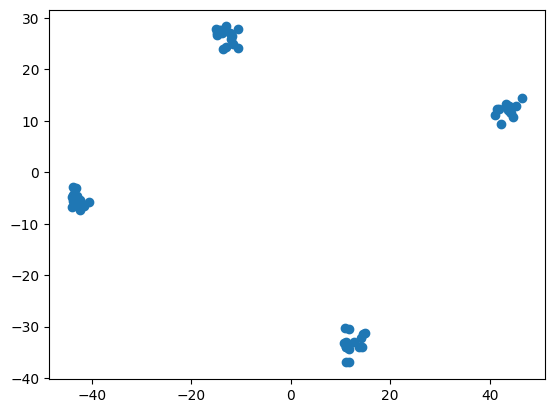

In [9]:
plt.scatter(scores_df.PC1, scores_df.PC2)
plt.show()